# Practico 3
Numeros aleatorios y monte carlo

In [82]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import expon 

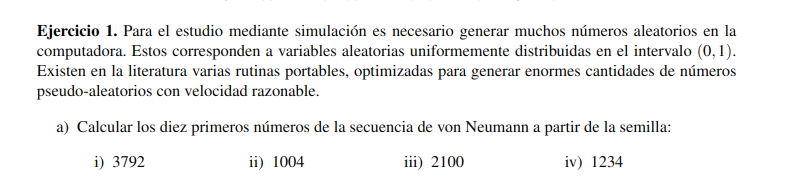

In [83]:
##generador de von Neumann
def vonNeumann(u):
    'u debe ser un entero de hasta 4 cifras'
    u=((u**2)//100) %10000
    return u


In [84]:
##Generación de una secuencia con el generador de von Neumann
##n=longitud deseada de la secuencia
##semilla: número entero de hasta cuatro dígitos
n = 10
#1234#2345 #1122 # 3792  #2100  #9999
semillas = [3792,1004,2100,1234]
secuencia=[semillas[0]]
for i in  semillas:
    secuencia=[i]
    for i in range(n):
        secuencia.append(vonNeumann(secuencia[i]))
    print(secuencia)

#secuencia_en_0_1 = [secuencia[i]/10000 for i in range(n)]
#print(secuencia_en_0_1)


[3792, 3792, 3792, 3792, 3792, 3792, 3792, 3792, 3792, 3792, 3792]
[1004, 80, 64, 40, 16, 2, 0, 0, 0, 0, 0]
[2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100]
[1234, 5227, 3215, 3362, 3030, 1809, 2724, 4201, 6484, 422, 1780]


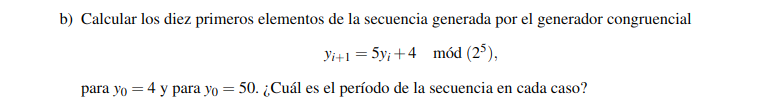

In [85]:
###Generador mixto
##M: período, a: multiplicador, c:incremento
def ranMixto(a, c, M, u):
    return ((a * u) + c) % M

In [86]:
n = 10
periodo = 32
multiplicador = 5
incremento = 4

semillas = [4,50]
for i in semillas:
    secuencia=[i]
    for j in range(n):
        secuencia.append(ranMixto(multiplicador,incremento,periodo,secuencia[j]))
    print(secuencia)

[4, 24, 28, 16, 20, 8, 12, 0, 4, 24, 28]
[50, 30, 26, 6, 2, 14, 10, 22, 18, 30, 26]


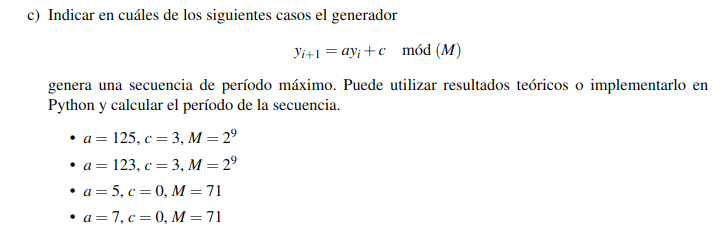

- La eleccion de M se relaciona con la longitud de la secuencia y la velocidad de calculo
- a y c, en funcion de M, determinaran el periodo.

Se dice periodo maximo cuando es = M. si y solo si
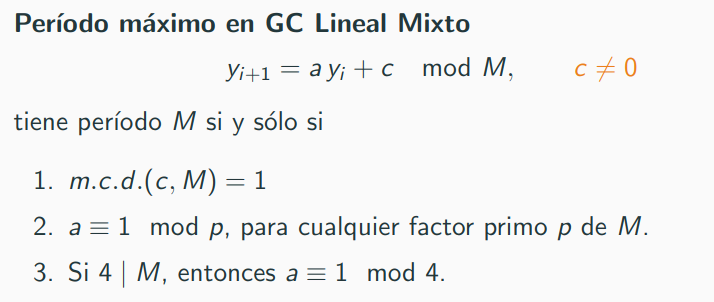


- a=125, c=3 y M=2^9
    mcd(3, 2^9) = 1
    M tiene factores primos = 2
    125 % 2 = 1. 

- a = 123, c = 3, M = 2^9
  - mcd(3, 2^9) = 1
  - M tiene factores primos = 2
  - 123 % 2 = 1. 
  
- a = 5, c = 3, M = 71
  - mcd(3, 71) = 1
  - M tiene factores primos = 71
  - 5 % 71 = 5. No hay periodo maximo

- a = 7, c = 0, M = 71
  - mcd(0, 71) = 71
  - M tiene factores primos = 71
  - 7 % 71 = 7. No hay periodo maximo

In [87]:
x = 123 % 2
print(x)

1


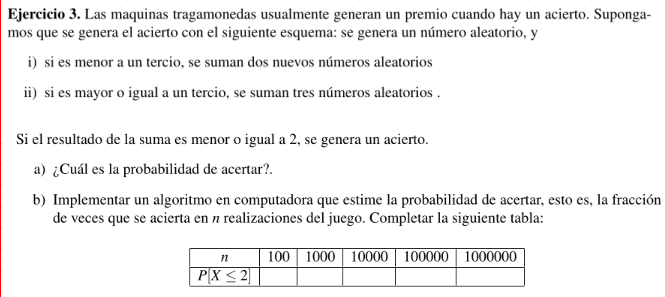

In [88]:

def tragamonedas(n):
    rd.seed(2345)
    wins = 0
    for i in range(n):
        u = rd.random()
        if u < (1/3):
            w = rd.random()+rd.random()
            if w <= 2:
                wins += 1       
        else:
            w = rd.random()+rd.random()+rd.random()
            if w <= 2:
                wins += 1
    return wins/n

def main():
    results = []
    for n in range(2,7):
        results.append(tragamonedas(10**n))
    
    """
    Grafico de los resultados de la aproximacion del calculo de la probabilidad asociados
    a la cantidad de itreaciones realizadas (10^2, 10^3, 10^4, 10^5, 10^6), en forma de grafico
    de puntos
    """
    """
    plt.bar(range(2,7), results) 
    # mejorar exactitud de los valores en el eje y
     plt.yticks(np.arange(0, 1.1, 0.05))
    plt.xticks(range(2,7), [f"10^{i}" for i in range(2,7)])
    plt.xlabel("Iteraciones")
    plt.ylabel("Probabilidad")
    plt.title("Aproximacion de la probabilidad de ganar en el tragamonedas")
    plt.show() 
    """

    print(results)


if __name__ == "__main__":
    main()


[0.93, 0.887, 0.8883, 0.89036, 0.889433]


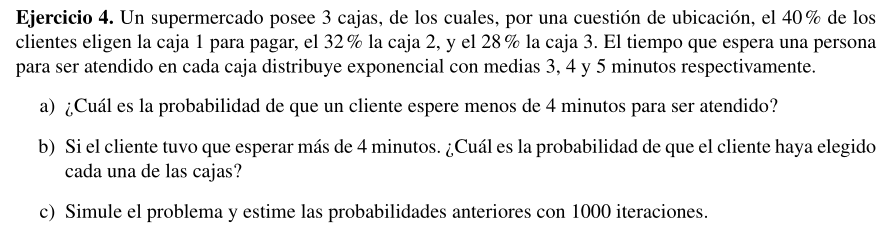

b)
pasados 4 minutos la probabilidad de elegir cada caja 
- c1 = 0,3021
- c2 = 0,33734
- c3 = 0,36052


In [89]:
def ejercicio_4_a(n):
    rd.seed(45678)
    t_total = 0 # contador de las veces que espero menos de 4 minutos en cualquier caja
    for i in range(n):
        u = rd.random()
        if u <= 0.4: # fue a caja 1
            t=float(expon.rvs(scale=3)) 
            # me da un numero aleatorio de la exponencial que representa el 
            # tiempo esperado en c1
        elif u > 0.4 and u <= 0.72: # fue a caja 2
            t=float(expon.rvs(scale=4))
            # me da un numero aleatorio de la exponencial que representa el 
            # tiempo esperado en c2 
        else: # fue a caja 3
            t=float(expon.rvs(scale=5))
            # me da un numero aleatorio de la exponencial que representa el 
            # tiempo esperado en c3
        if t <= 4.0:
            t_total += 1
    
    return t_total/n

In [90]:
def ejercicio_4_b(n):
    rd.seed(45678)
    cajas = np.zeros(3)
    for i in range(n):
        u = rd.random()
        if u <= 0.4: # fue a caja 1
            t= float(expon.rvs(scale=3))
            if t > 4.0:
                cajas[0] += 1
        elif u > 0.4 and u <= 0.72: # fue a caja 2
            t= float(expon.rvs(scale=4))
            if t > 4.0:
                cajas[1] += 1
        else: # fue a caja 3
            t= float(expon.rvs(scale=5))
            if t > 4.0:
                cajas[2] += 1
    cajas /= 1.0-0.651 # 0.651 es la probabilidad de esperar menos de 4 minutos en cualquier caja
    return cajas/n       

In [91]:
n = 10000
res_a = ejercicio_4_a(n)
print(f"La probabilidad de esperar menos de 4 minutos en cualquier caja es: {res_a}")
res_b = ejercicio_4_b(n)
print(f"La probabilidad de esperar 4 minutos en caja 1 es: {res_b[0]}")
print(f"La probabilidad de esperar 4 minutos en caja 2 es: {res_b[1]}")
print(f"La probabilidad de esperar 4 minutos en caja 3 es: {res_b[2]}")

La probabilidad de esperar menos de 4 minutos en cualquier caja es: 0.652
La probabilidad de esperar 4 minutos en caja 1 es: 0.29398280802292265
La probabilidad de esperar 4 minutos en caja 2 es: 0.3472779369627508
La probabilidad de esperar 4 minutos en caja 3 es: 0.35128939828080236


### Ejercicio 5

In [92]:
def integral_monte_carlo (funciong, a, b , Nsim):
    integral = 0
    for i in range(Nsim):
        integral += funciong(a + (b-a) * rd.random())
    return integral * (b-a) / Nsim

def integral_mult_monte_carlo(funciong, a, b, c, d, Nsim):
    integral = 0
    for i in range(Nsim):
        integral += funciong(a + (b-a) * rd.random(), c + (d-c) * rd.random())
        
    return integral / Nsim

def integral_mult_monte_carlo_0_inf(funciong,Nsim):
    integral = 0
    for i in range(Nsim):
        u1 = rd.random()
        u2 = rd.random()
        integral += funciong(1/u1 -1, 1/u2 -1)/((u1**2)*(u2**2))
    return integral / Nsim

In [93]:
def funcion_a(x):
    return (1- x**2)**(3/2)

def funcion_b(x):
    return x/(x**2 -1)

def funcion_c(x):
    return ((1/x - 1) * (1 + ( 1/x - 1)**2)** - 2 )/x**2

def funcion_d(x):
    return (np.exp(-(1/x -1)**2))/x**2

def funcion_e(x,y):
    return np.exp((x+y)**2)

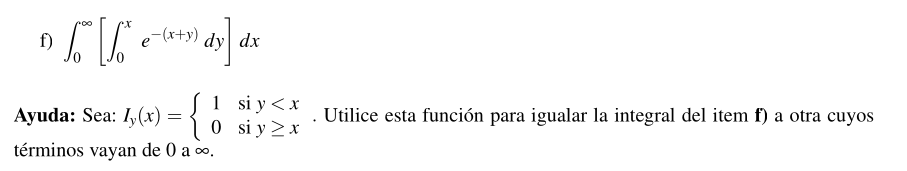

In [94]:
def I(u1,u2):
    if u1 < u2:
        return 1
    else:
        return 0
    
def funcion_f(x,y):
    return np.exp(-(x+y))*I(x,y)

In [95]:
# matrix of results, first row contain the number of simulations,
# the next row contain the results of function a in each simulation

results = [[],[],[],[],[],[],[]]
for i in range(2,7):
    n = 10**(i)
    results[0].append(n)
    results[1].append(integral_monte_carlo(funcion_a, 0, 1, n))
    results[2].append(integral_monte_carlo(funcion_b, 2, 3, n))
    results[3].append(integral_monte_carlo(funcion_c, 0, 1, n))
    results[4].append(2 * integral_monte_carlo(funcion_d, 0, 1, n))
    # integrales multiples
    results[5].append(integral_mult_monte_carlo(funcion_e, 0, 1, 0, 1, n))

    results[6].append(integral_mult_monte_carlo_0_inf(funcion_f,n))

valor_r = [0.589048, 0.490, 0.5, 1.7724, 4.89916, 0.5]
for i in range(1,7):
    print(f"=====Funcion {i}=====")
    print(f"n = 100, aproximacion = {results[i][0]}")
    print(f"n = 1000, aproximacion = {results[i][1]}")
    print(f"n = 10000, aproximacion = {results[i][2]}")
    print(f"n = 100000, aproximacion = {results[i][3]}")
    print(f"n = 1000000, aproximacion = {results[i][4]}")
    print(f"Valor exacto = {valor_r[i-1]}")

=====Funcion 1=====
n = 100, aproximacion = 0.6184629038338469
n = 1000, aproximacion = 0.5959269528186177
n = 10000, aproximacion = 0.5903928908300726
n = 100000, aproximacion = 0.5907246670452476
n = 1000000, aproximacion = 0.5886761765094796
Valor exacto = 0.589048
=====Funcion 2=====
n = 100, aproximacion = 0.4826409265766944
n = 1000, aproximacion = 0.4912925534865776
n = 10000, aproximacion = 0.4896658869950559
n = 100000, aproximacion = 0.49006090940541375
n = 1000000, aproximacion = 0.49034199936655287
Valor exacto = 0.49
=====Funcion 3=====
n = 100, aproximacion = 0.48615166847629565
n = 1000, aproximacion = 0.4736083955293101
n = 10000, aproximacion = 0.5022633025415336
n = 100000, aproximacion = 0.5010598695439938
n = 1000000, aproximacion = 0.500259939515584
Valor exacto = 0.5
=====Funcion 4=====
n = 100, aproximacion = 1.9027300100421687
n = 1000, aproximacion = 1.76691207035806
n = 10000, aproximacion = 1.756675104130191
n = 100000, aproximacion = 1.779673944981786
n = 10